### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# CALCULO DE FACTURACION TOTAL DE CADA TIENDA
def facturacionTotal(tienda):
  total = tienda['Precio'].sum()
  return total

totalTienda = facturacionTotal(tienda)
totalTienda2 = facturacionTotal(tienda2)
totalTienda3 = facturacionTotal(tienda3)
totalTienda4 = facturacionTotal(tienda4)

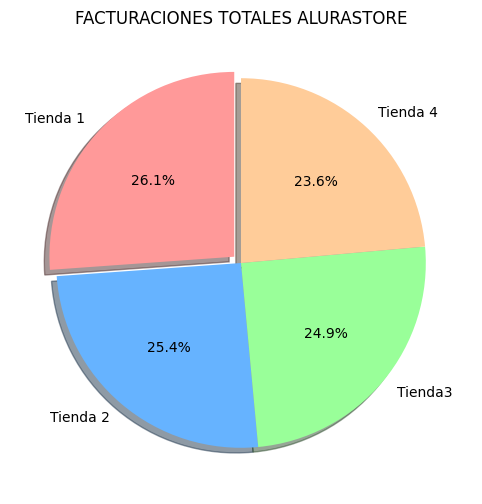

112504700.0


In [ ]:
# Grafico de pie para visualizar que sucursal tuvo mayor ingresos

# Datos
labels = ['Tienda 1', 'Tienda 2', 'Tienda3', 'Tienda 4']
values = [totalTienda, totalTienda2, totalTienda3, totalTienda4]
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05, 0, 0, 0)  # Separar la primera rebanada

# Crear grafico
plt.figure(figsize=(8, 6))
plt.pie(values,
        labels = labels,
        colors = colores,
        autopct='%1.1f%%',  # Mostrar porcentajes
        startangle=90,     # Rotación inicial
        explode=explode,   # Separar rebanadas
        shadow=True)       # Efecto de sombra
plt.title("FACTURACIONES TOTALES ALURASTORE")

plt.show()
print(totalTienda - totalTienda4)

# 2. Ventas por categoría

In [ ]:
# CALCULO DE CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORIA DE CADA TIENDA
def ventaPorCategoria(tienda):
  conteo = tienda['Categoría del Producto'].value_counts()
  return conteo

conteoCategoria = ventaPorCategoria(tienda)
conteoCategoria2 = ventaPorCategoria(tienda2)
conteoCategoria3 = ventaPorCategoria(tienda3)
conteoCategoria4 = ventaPorCategoria(tienda4)

In [ ]:
conteos = [conteoCategoria, conteoCategoria2, conteoCategoria3, conteoCategoria4]
print(conteos)

[Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes            

# 3. Calificación promedio de la tienda


In [2]:
# CALCULO DE LA MEDIA DE LA CALIFICACION DE CADA TIENDA
def calificacionPromedio(tienda):
  promedio = tienda['Calificación'].sum() / len(tienda['Calificación'])
  return promedio

calificacionTienda = calificacionPromedio(tienda)
calificacionTienda2 = calificacionPromedio(tienda2)
calificacionTienda3 = calificacionPromedio(tienda3)
calificacionTienda4 = calificacionPromedio(tienda4)

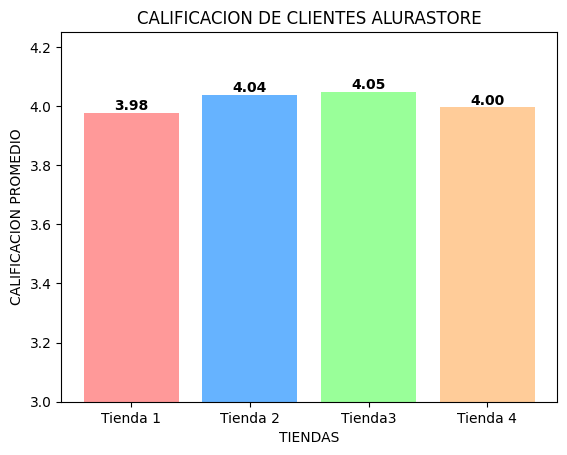

In [8]:
# GRAFICO DE CAJAS PARA VISUALIZAR CUAL TIENDA ES LA MENOS CALIFICADA

# Datos
values = [calificacionTienda, calificacionTienda2, calificacionTienda3, calificacionTienda4]
labels = ['Tienda 1', 'Tienda 2', 'Tienda3', 'Tienda 4']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Crear grafico
plt.bar(labels, values, color = colors)

for i in range(len(values)):
    plt.text(i, values[i], f'{values[i]:.2f}',
             ha='center', va='bottom', fontweight='bold')

plt.title('CALIFICACION DE CLIENTES ALURASTORE')
plt.xlabel('TIENDAS')
plt.ylabel('CALIFICACION PROMEDIO')
plt.ylim(3, 4.25)

plt.show()

# 4. Productos más y menos vendidos

In [9]:
def conteoProductos(tienda):
  conteo = tienda['Producto'].value_counts()
  return conteo

#datos
conteos = {
    'Tienda 1':conteoProductos(tienda),
    'Tienda 2':conteoProductos(tienda2),
    'Tienda 3':conteoProductos(tienda3),
    'Tienda 4':conteoProductos(tienda4)
}

<Figure size 2000x1200 with 0 Axes>

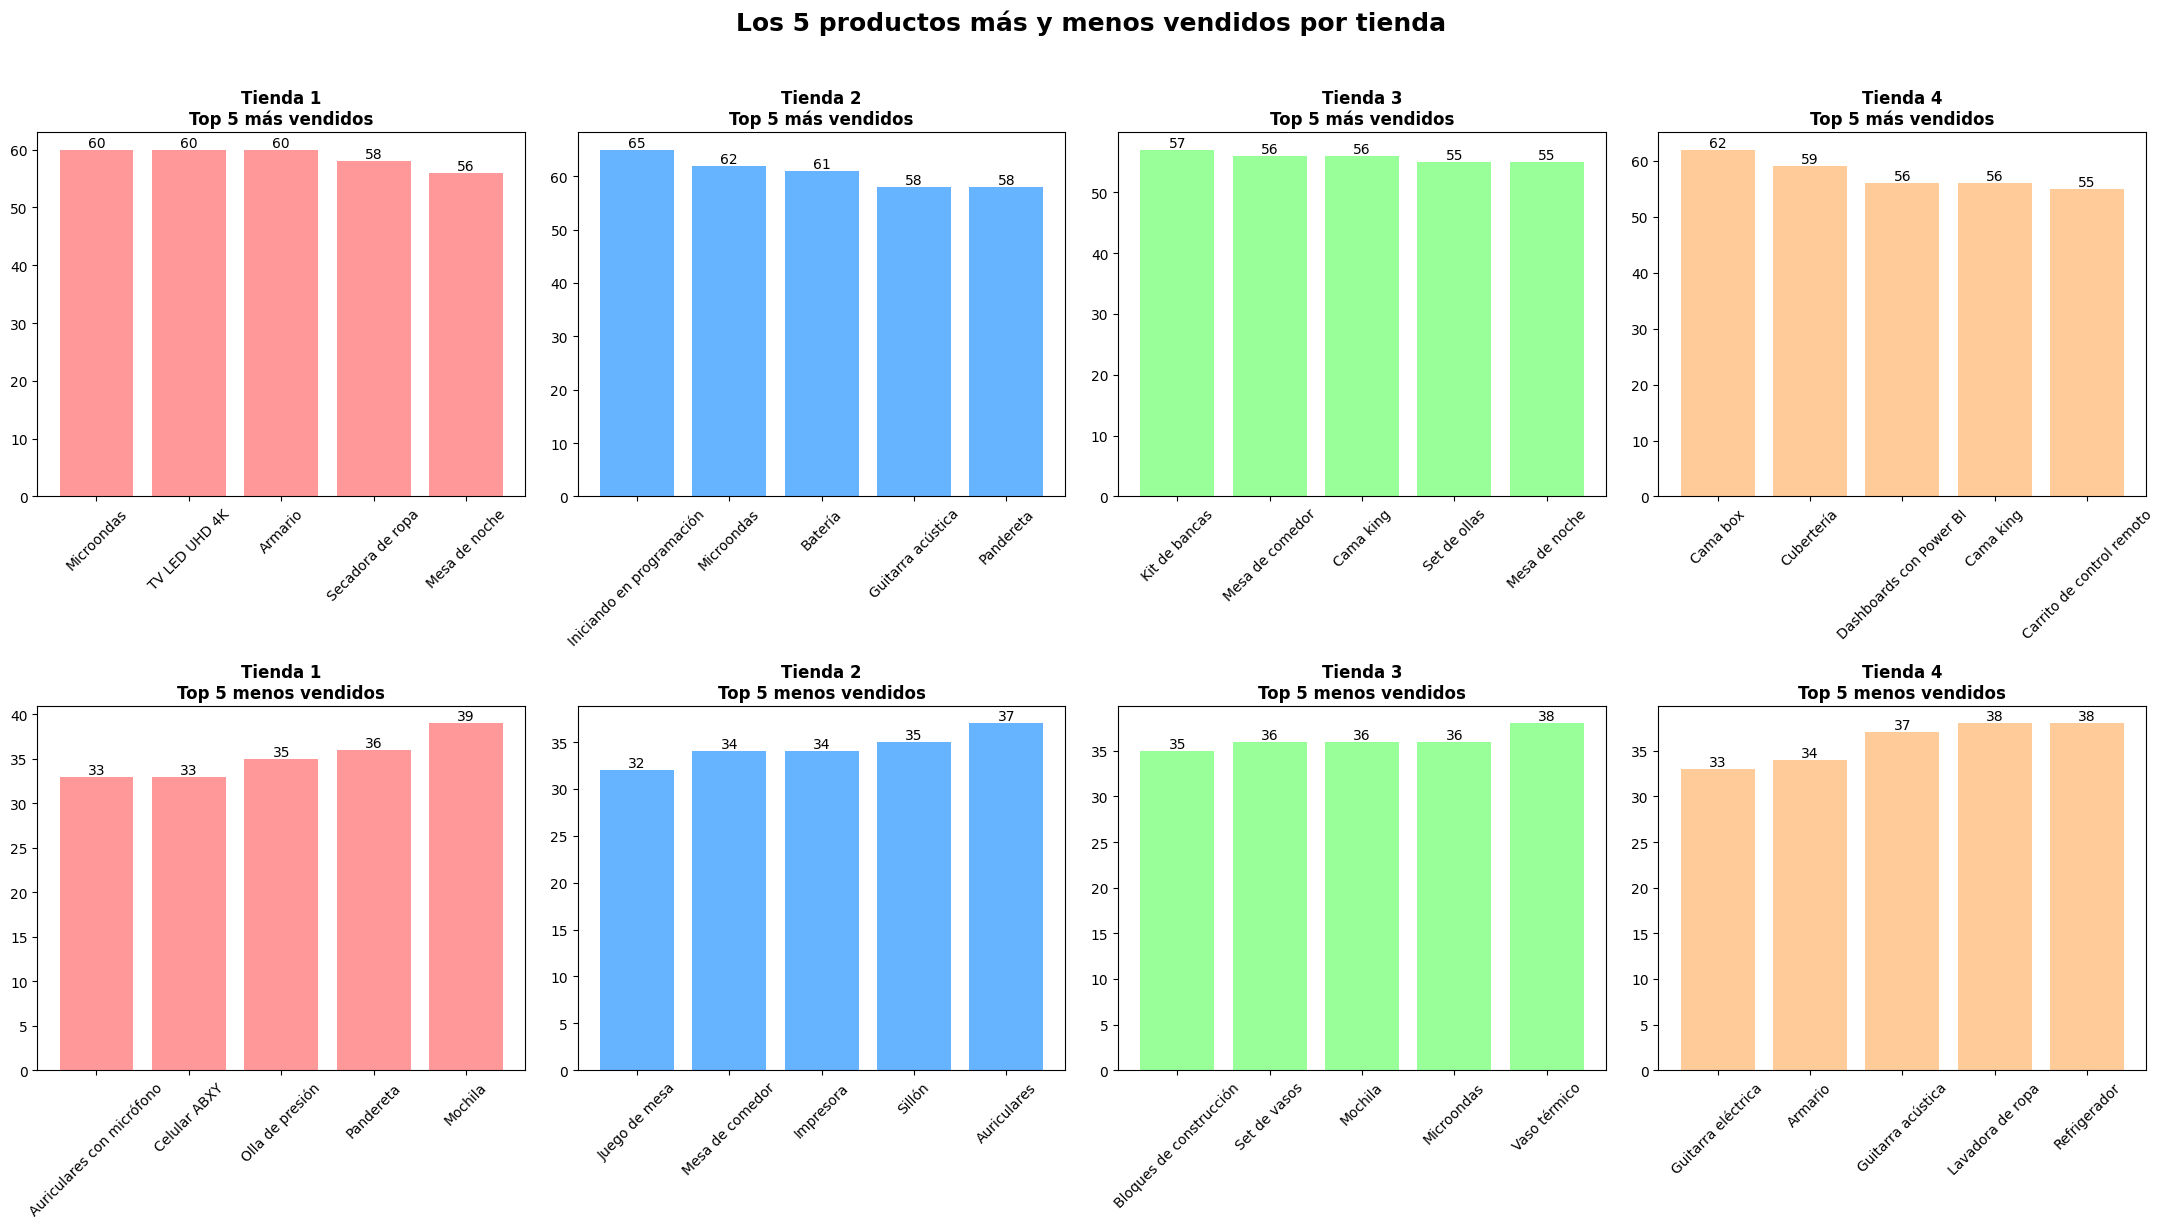

In [16]:
# Crear gráfico
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(2, 4, figsize=(22, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.8)  # Aumenté el espacio vertical

for i, (nombre_tienda, conteo) in enumerate(conteos.items()):
    # 5 categorías más vendidas
    top5 = conteo.nlargest(5)
    bars = axes[0, i].bar(top5.index, top5.values, color=colores[i])
    axes[0, i].set_title(f'{nombre_tienda}\nTop 5 más vendidos', fontweight='bold')
    axes[0, i].tick_params(axis='x', rotation=45)

    for bar in bars:
        height = bar.get_height()
        axes[0, i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)

    # 5 categorías menos vendidas
    bottom5 = conteo.nsmallest(5)
    bars = axes[1, i].bar(bottom5.index, bottom5.values, color=colores[i])
    axes[1, i].set_title(f'{nombre_tienda}\nTop 5 menos vendidos', fontweight='bold')
    axes[1, i].tick_params(axis='x', rotation=45)

    for bar in bars:
        height = bar.get_height()
        axes[1, i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)

plt.suptitle('Los 5 productos más y menos vendidos por tienda', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
def envioPromedio(tienda):
  promedio = tienda['Costo de envío'].sum() / len(tienda['Costo de envío'])
  return promedio

envioTienda = envioPromedio(tienda)
envioTienda2 = envioPromedio(tienda2)
envioTienda3 = envioPromedio(tienda3)
envioTienda4 = envioPromedio(tienda4)

[np.float64(26018.60958033065), np.float64(25216.235693090293), np.float64(24805.680373039424), np.float64(23459.457167090754)]


#INFORME

##VENTAS
La tienda con menos rendimiento en facturacion total es la tienda 4, la cual representa un 23.6% de las ventas totales de todas las sucursales, un total de $112,504,700.00 de diferencia de ganancias con la Tienda 1.


##VENTAS POR CATEGORIA Y PRODUCTOS MAS Y MENOS VENDIDOS
Curiosamente en todas las sucursales los articulos menos vendidos son libros y articulos para el hogar, mientras que muebles, electronicos y juguetes son las 3 categorias mas vendidas en cada tienda, esto puede ser de interes para el comprador para que le pueda dar un enfoque de venta que le ayude a maximizar sus ganancias.


##CALIFICACION PROMEDIO DE LA TIENDA
Se puede apreciar que los clientes de ALURASTORE adoran las sucursales, pero sorpresivamente la peor calificada en promedio es la primera sucursal, la cual es la sucursal que mejor rendimiento tiene y se codea con la de peor rendimiento, por lo que en este apartado no tomaria mucho en cuenta este promedio si lo que se busca es vender la tienda con peor rendimiento.



##ENVIO PROMEDIO POR TIENDA
Cada tienda tiene gastos de envio en relacion a sus ventas, por ejemplo, la que mas gasta en envio por promedio es la sucursal 1, la cual tiene el mayor rendimiento en ventas y la que menos gasta en promedio es la sucursal 4, la cual es la que peor rendimiento tiene, no creo que se excedan en este tipo de gasto, por lo tanto yo pondria mas atencion a las facturaciones totales que a este apartado.

##CONCLUSIONES
Si buscamos vender una tienda sin causar un gran impacto a las ganancias totales de todas las tiendas, me decantaria por vender la sucursal 4, ya que es la que tiene menos ingresos que la demas e incluso una menor calificacion por parte de los clientes.